<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'
with open(NOME_ARQUIVO_FONTE) as xml:
  fonte = BeautifulSoup(xml, "lxml")
fonte

estados = fonte.find_all("nome")
estados = [estado.string for estado in estados]
siglas = fonte.find_all("sigla")
siglas = [sigla.string for sigla in siglas]
regioes = fonte.find_all("regiao")
regioes = [regiao.string for regiao in regioes]
print(estados)
print(siglas)
print(regioes)

import pandas as pd
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
estados_br = pd.DataFrame({
  "estado": estados,
  "sigla": siglas,
  "regiao": regioes,
})
estados_br.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=";")


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


<ipython-input-2-3a2e4a431085>:6: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(xml, "lxml")


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd
from google.colab import files

df = pd.read_csv('cidades-bruto.csv', encoding='utf-8')

df_2010 = df[df['Censo'] == 2010]

print(df_2010.head())

df_filtered = df_2010[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

df_filtered.columns = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']

df_filtered.to_csv('cidades-limpo.csv', sep=';', index=False)

files.download('cidades-limpo.csv')

                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   

        nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0   Tremedal  2010.0  5.788399e+04         18433    3140.239990   
1     Turuçu  2010.0  4.572388e+04          4000   11430.969727   
2    Vitória  2010.0  1.978263e+07        320156   61790.589844   
3  Jacutinga  2010.0  2.478160e+05         21424   11567.209961   
4    Nazária  2010.0  2.095138e+04          7895    2653.750000   

                          Descrição               legenda  classe  \
0  Produto Interno Bruto per capita             - 963

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
import pandas as pd

estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

estados_df.head()

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [ ]:
estados_df.shape

(27, 3)

In [ ]:
cidades_df.head()

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000


In [ ]:
cidades_df.shape

(5555, 5)

In [ ]:
estados_df['estado'].unique()

array(['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA',
       'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA',
       'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA',
       'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS'], dtype=object)

In [ ]:
cidades_df['estado'].unique()

array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS',
       'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO',
       'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ',
       'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ',
       'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE',
       'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'], dtype=object)

In [ ]:
cidades_df['estado']= cidades_df['estado'].replace(['são paulo'],['sao paulo'])
cidades_df['estado']= cidades_df['estado'].replace(['amapá'],['amapa'])
cidades_df['estado']= cidades_df['estado'].replace(['ceará'],['ceara'])
cidades_df['estado']= cidades_df['estado'].replace(['goiás'],['goias'])
cidades_df['estado']= cidades_df['estado'].replace(['maranhão'],['maranhao'])
cidades_df['estado']= cidades_df['estado'].replace(['pará'],['para'])
cidades_df['estado']= cidades_df['estado'].replace(['paraíba'],['paraiba'])
cidades_df['estado']= cidades_df['estado'].replace(['paraná'],['parana'])
cidades_df['estado']= cidades_df['estado'].replace(['piauí'],['piaui'])
cidades_df['estado']= cidades_df['estado'].replace(['rondônia'],['rondonia'])

In [ ]:
def padronizar_estado(estado):
    return estado.lower().strip()

estados_df['estado'] = estados_df['estado'].apply(padronizar_estado)
cidades_df['estado'] = cidades_df['estado'].apply(padronizar_estado)

brasil_df = pd.merge(estados_df, cidades_df, on='estado', how='outer')

brasil_df.to_csv('brasil.csv', index=False)

brasil_df.head()

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,acre,AC,NORTE,Marechal Thaumaturgo,14275.0,109181.867188,7648.470215
1,acre,AC,NORTE,Senador Guiomard,19697.0,217153.859375,11024.719727
2,acre,AC,NORTE,Assis Brasil,5662.0,48347.300781,8538.910156
3,acre,AC,NORTE,Epitaciolândia,14224.0,129641.093750,9114.250000
4,acre,AC,NORTE,Manoel Urbano,7505.0,61478.730469,8191.700195


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv')
brasil_df.head()

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,acre,AC,NORTE,Marechal Thaumaturgo,14275.0,109181.867188,7648.470215
1,acre,AC,NORTE,Senador Guiomard,19697.0,217153.859375,11024.719727
2,acre,AC,NORTE,Assis Brasil,5662.0,48347.300781,8538.910156
3,acre,AC,NORTE,Epitaciolândia,14224.0,129641.093750,9114.250000
4,acre,AC,NORTE,Manoel Urbano,7505.0,61478.730469,8191.700195


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
top_10_cidades = brasil_df.sort_values(by='populacao', ascending=False).head(10)
print(top_10_cidades)

                estado sigla        regiao          cidade   populacao  \
5341         são paulo   NaN           NaN       São Paulo  11037593.0   
3608    rio de janeiro    RJ       SUDESTE  Rio de Janeiro   6186710.0   
247              bahia    BA      NORDESTE        Salvador   2998056.0   
804   distrito federal    DF  CENTRO-OESTE        Brasília   2606885.0   
768              ceará   NaN           NaN       Fortaleza   2505552.0   
2308      minas gerais    MG       SUDESTE  Belo Horizonte   2452617.0   
2550            paraná   NaN           NaN        Curitiba   1851215.0   
143           amazonas    AM         NORTE          Manaus   1738641.0   
3306        pernambuco    PE      NORDESTE          Recife   1561659.0   
3169              pará   NaN           NaN           Belém   1437600.0   

              pib  pib_percapita  
5341  389317152.0   35271.929688  
3608  175739344.0   28405.949219  
247    32824228.0   10948.500000  
804   131487264.0   50438.460938  
768    317

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
top_5_cidades = brasil_df.sort_values(by='pib_percapita', ascending=True).head(5)
print(top_5_cidades)

        estado sigla regiao              cidade  populacao           pib  \
1323  maranhão   NaN    NaN  São Vicente Ferrer    20463.0  39492.960938   
3137      pará   NaN    NaN        Jacareacanga    41487.0  80748.671875   
3145      pará   NaN    NaN          Curralinho    27543.0  55652.523438   
3183      pará   NaN    NaN                Faro    19585.0  40236.570312   
1218  maranhão   NaN    NaN             Cajapió    10337.0  22781.035156   

      pib_percapita  
1323    1929.969971  
3137    1946.359985  
3145    2020.569946  
3183    2054.459961  
1218    2203.830078  


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
top_15_cidades = brasil_df.sort_values(by='pib', ascending=False).head(15)
print(top_15_cidades)

                 estado sigla        regiao                 cidade  \
5341          são paulo   NaN           NaN              São Paulo   
3608     rio de janeiro    RJ       SUDESTE         Rio de Janeiro   
804    distrito federal    DF  CENTRO-OESTE               Brasília   
2550             paraná   NaN           NaN               Curitiba   
2308       minas gerais    MG       SUDESTE         Belo Horizonte   
143            amazonas    AM         NORTE                 Manaus   
3935  rio grande do sul    RS           SUL           Porto Alegre   
247               bahia    BA      NORDESTE               Salvador   
5293          são paulo   NaN           NaN              Guarulhos   
768               ceará   NaN           NaN              Fortaleza   
5410          são paulo   NaN           NaN               Campinas   
5176          são paulo   NaN           NaN                 Osasco   
4880          são paulo   NaN           NaN  São Bernardo do Campo   
5414          são pa

 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
pib_sc = brasil_df.loc[brasil_df['estado'] == 'santa catarina', 'pib'].values[0]
print(pib_sc)

364577.8125


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
populacao_sul = brasil_df.loc[brasil_df['regiao'] == 'SUL', 'populacao'].sum()
print(populacao_sul)

17032871.0


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
pib_percapita_ms = brasil_df.loc[brasil_df['estado'] == 'mato grosso do sul', 'pib_percapita'].mean()
print(pib_percapita_ms)

14458.896859975644


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].sum()
print(populacao_brasil)

191176146.0


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

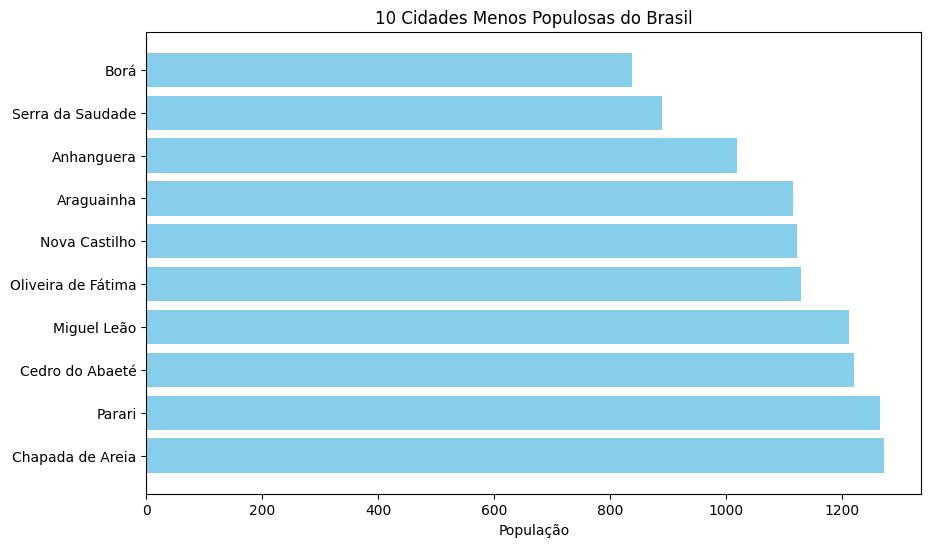

In [ ]:
# código para gerar a visualização
import matplotlib.pyplot as plt

top_10_cidades = brasil_df.sort_values(by='populacao', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_cidades['cidade'], top_10_cidades['populacao'], color='skyblue')
plt.xlabel('População')
plt.title('10 Cidades Menos Populosas do Brasil')
plt.gca().invert_yaxis()  # Inverte o eixo y para mostrar a cidade menos populosa no topo
plt.show()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

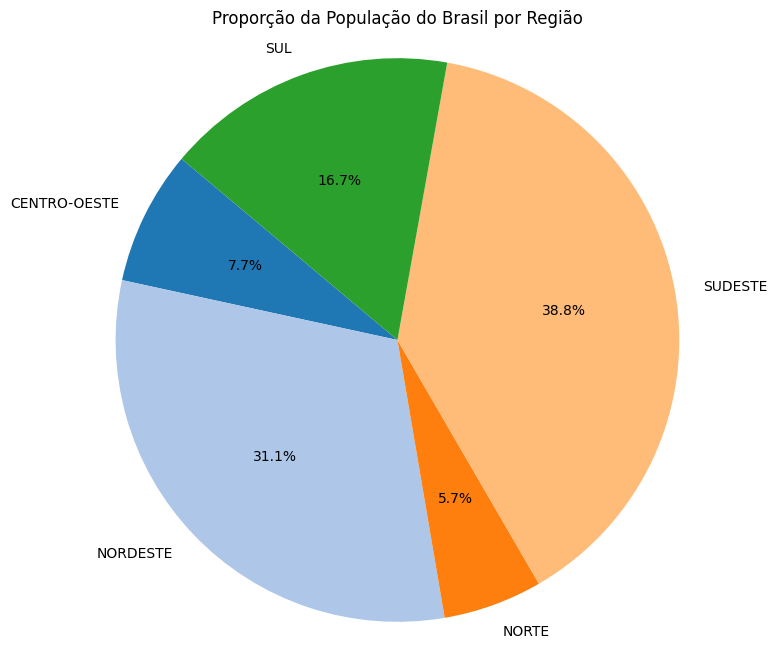

In [ ]:
# código para gerar a visualização
populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Proporção da População do Brasil por Região')
plt.axis('equal')
plt.show()